## Importing the necessary libraries

In [1]:
# imprting the pandas 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Reading csv file 

In [2]:
df = pd.read_csv('cost_revenue.csv')

## Movies Data  

In [3]:
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


## Shape of the data 

In [4]:
df.shape

(5391, 6)

## Data Description 

In [5]:
df.describe

<bound method NDFrame.describe of       Rank Release Date                     Movie Title Production Budget ($)  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,0

# Data Cleaning 
### 1.Reformationg and remove dollar sign

In [6]:
df[df.columns[3:]] = df[df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,110000.0,11000000.0,10000000.0
1,5140,5/9/1916,Intolerance,385907.0,0.0,0.0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000.0,8000000.0,8000000.0
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000.0,3000000.0,3000000.0
4,5222,1/1/1925,The Big Parade,245000.0,22000000.0,11000000.0
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000.0,0.0,0.0
5387,126,12/18/2018,Aquaman,160000000.0,0.0,0.0
5388,96,12/31/2020,Singularity,175000000.0,0.0,0.0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000.0,0.0,0.0


### 2.Drop unnecessary columns and zero values 

In [7]:
df = df.drop(['Rank','Release Date','Movie Title','Domestic Gross ($)'],axis=1)
df


,Production Budget ($),Worldwide Gross ($)
0,110000.0,11000000.0
1,385907.0,0.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
...,...,...
5386,15000000.0,0.0
5387,160000000.0,0.0
5388,175000000.0,0.0
5389,50000000.0,0.0


### 3.Rename columns

In [8]:
df = df.rename(columns = {'Production Budget ($)': 'prediction_budget_usd', 'Worldwide Gross ($)': 'worldwide_gross_usd'}, inplace = False)
df


,prediction_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
1,385907.0,0.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
...,...,...
5386,15000000.0,0.0
5387,160000000.0,0.0
5388,175000000.0,0.0
5389,50000000.0,0.0


#### 4.Drop rows with zero values 

In [9]:
df = df[~(df[['prediction_budget_usd','worldwide_gross_usd']] == 0).any(axis=1)]
df

,prediction_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0
...,...,...
5378,55000000.0,376856949.0
5379,40000000.0,166893990.0
5380,185000000.0,561137727.0
5381,175000000.0,140012608.0


### Data overview 

In [10]:
df.describe()

,prediction_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


### set up X and Y 

In [11]:
X = DataFrame(df, columns=['prediction_budget_usd'])
y = DataFrame(df, columns=['worldwide_gross_usd'])

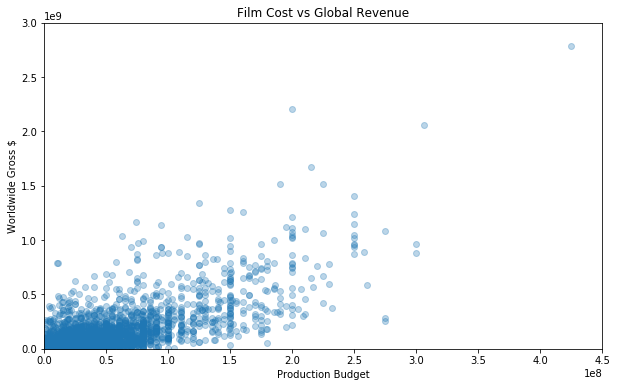

In [25]:
plt.figure(figsize=(10,6)) ## chart size 
plt.scatter(X,y, alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross $')
plt.xlim(0,450000000) # put a rannge X
plt.ylim(0,3000000000) # put a rannge Y
plt.show()

### Set up the regression 

In [13]:
regression = LinearRegression()
regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Slope Coefficient

In [14]:
regression.coef_

array([[3.11150918]])

In [15]:
regression.intercept_

array([-7236192.72913963])

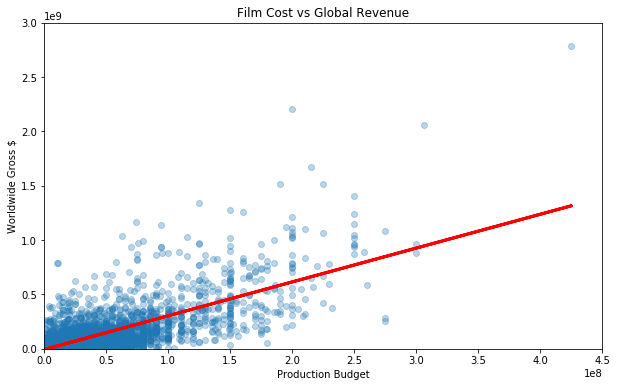

In [16]:
plt.figure(figsize=(10,6)) ## chart size 
plt.scatter(X,y, alpha=0.3)
plt.plot(X, regression.predict(X), color='red',linewidth=3) # calculate the prediction 
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross $')
plt.xlim(0,450000000) # put a rannge X
plt.ylim(0,3000000000) # put a rannge Y
plt.show()

## Evaluation and analysis in the algorithm performance  

- Slope coefficient is : 3.11150918 which is a positive relationship 
- Each dollar spent on producing a movie, there is $3.1 revenue
- Intercept  : -7236192 which means a movie with a 0 budget is losing ~ 7 million 

### Calculating the score 

In [17]:
regression.score(X,y)

0.5496485356985729

### Prediction of revenue

In [18]:
df["revenue_prediction"] = ""
df["revenue_prediction"] = df.apply(lambda a: (3.1115 * df['prediction_budget_usd']) - 7236192)
df

C:\Users\alawi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alawi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,prediction_budget_usd,worldwide_gross_usd,revenue_prediction
0,110000.0,11000000.0,-6893927.0
2,200000.0,8000000.0,-6613892.0
3,100000.0,3000000.0,-6925042.0
4,245000.0,22000000.0,-6473874.5
5,3900000.0,9000000.0,4898658.0
...,...,...,...
5378,55000000.0,376856949.0,163896308.0
5379,40000000.0,166893990.0,117223808.0
5380,185000000.0,561137727.0,568391308.0
5381,175000000.0,140012608.0,537276308.0
